In [135]:
# Importing python library
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

get_ipython().run_line_magic('matplotlib', 'inline')

In [111]:
# Read file csv
mixed = pd.read_csv("rdataset7.csv")
mixed.head()

,danceability,energy,acousticness,instrumentalness,valence,target
0,0.707,0.681,0.0632,0.000005,0.646,0
1,0.715,0.620,0.4170,0.000000,0.172,0
2,0.644,0.728,0.0543,0.169000,0.430,0
3,0.714,0.472,0.0130,0.000005,0.238,0
4,0.692,0.470,0.2520,0.000000,0.464,0


In [112]:
mixed.isnull().sum()

danceability        0
energy              0
acousticness        0
instrumentalness    0
valence             0
target              0
dtype: int64

In [113]:
mixed.dtypes

danceability        float64
energy              float64
acousticness        float64
instrumentalness    float64
valence             float64
target                int64
dtype: object

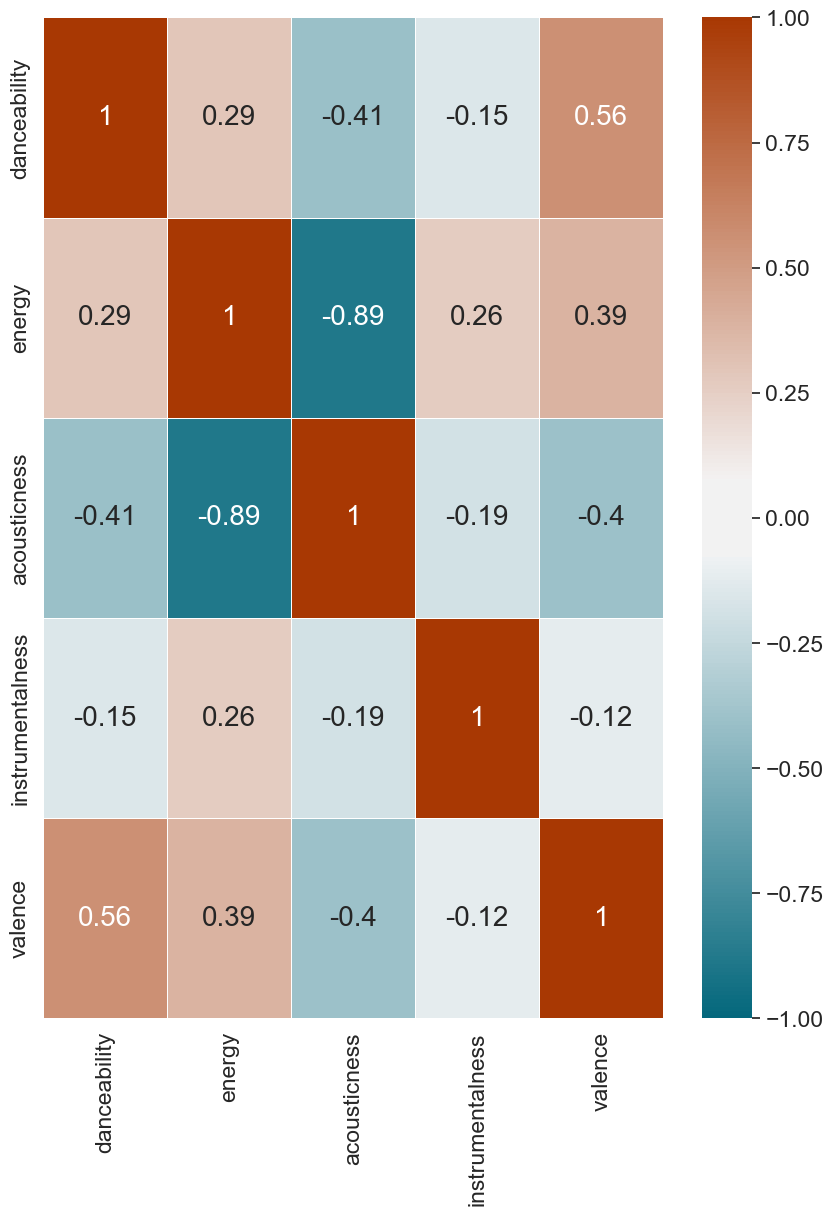

In [154]:
plt.figure(figsize=(10, 13))
plt.rcParams.update({'font.size': 20})

sns.set_style('darkgrid')
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap(mixed.drop("target", axis=1).corr(), vmin = -1, vmax = 1, annot = True, cmap=cmap, lw = .5, linecolor = 'white')

plt.savefig("Confusion_matrix_feature.jpg")

In [115]:
# STEP 6: Normalize/Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(mixed.drop('target', axis=1))

scaled_features = scaler.transform(mixed.drop('target',axis=1))
mixed_feat = pd.DataFrame(scaled_features, columns = mixed.columns[:-1])

mixed_feat.head(5)

,danceability,energy,acousticness,instrumentalness,valence
0,1.058454,0.263503,-0.655628,-0.427893,0.914321
1,1.105608,0.056649,0.308933,-0.427919,-1.121392
2,0.687119,0.422882,-0.679892,0.413135,-0.013346
3,1.099714,-0.445225,-0.792488,-0.427897,-0.837939
4,0.970041,-0.452007,-0.140905,-0.427919,0.132676


In [116]:
# STEP 7: Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = mixed_feat
y = mixed['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100, 
                                                    shuffle=True)

In [117]:
# STEP 8: Train model
import math
math.sqrt(len(y_test))

6.928203230275509

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [119]:
# STEP 9: Make predictions
prediction = knn.predict(X_test)
prediction

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       1.00      1.00      1.00        11
           2       0.75      0.50      0.60        12
           3       0.75      1.00      0.86        12

    accuracy                           0.81        48
   macro avg       0.82      0.82      0.81        48
weighted avg       0.81      0.81      0.80        48



In [120]:
report = pd.DataFrame(classification_report(y_test, prediction, output_dict=True))
report

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.769231,1.0,0.75,0.750000,0.8125,0.817308,0.812500
recall,0.769231,1.0,0.50,1.000000,0.8125,0.817308,0.812500
f1-score,0.769231,1.0,0.60,0.857143,0.8125,0.806593,0.801786
support,13.000000,11.0,12.00,12.000000,0.8125,48.000000,48.000000


Text(0, 0.5, 'error rate')

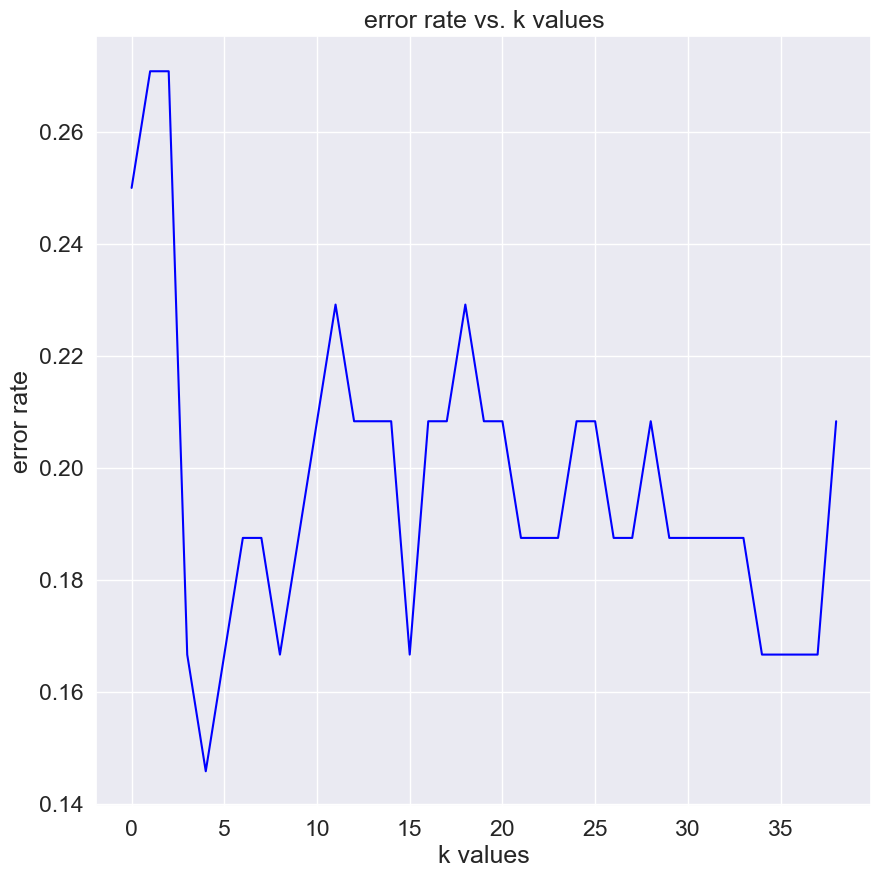

In [122]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
    
plt.figure(figsize=(10,10))    
plt.plot(error_rate, color='blue')
plt.title('error rate vs. k values')
plt.xlabel('k values')
plt.ylabel('error rate')

### Tuning

In [123]:
train_scores = []
test_scores = []
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [124]:
test_scores

[0.75,
 0.7291666666666666,
 0.7291666666666666,
 0.8333333333333334,
 0.8541666666666666,
 0.8333333333333334,
 0.8125,
 0.8125,
 0.8333333333333334,
 0.8125,
 0.7916666666666666,
 0.7708333333333334,
 0.7916666666666666,
 0.7916666666666666,
 0.7916666666666666,
 0.8333333333333334,
 0.7916666666666666,
 0.7916666666666666,
 0.7708333333333334,
 0.7916666666666666]

Maximum KNN score on the test data: 85.42%


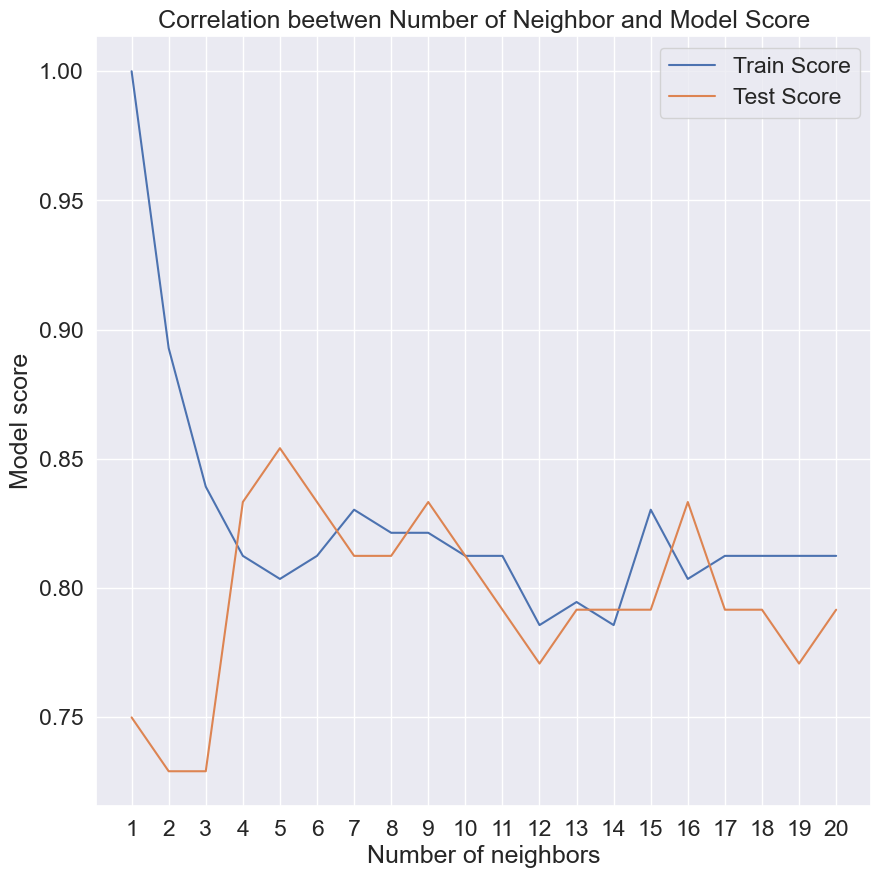

In [142]:
plt.figure(figsize=(10, 10))

plt.title("Correlation beetwen Number of Neighbor and Model Score")
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.savefig("KNN_tuning_score.jpg")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [127]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction= knn.predict(X_test)
prediction

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       1.00      1.00      1.00        11
           2       0.78      0.58      0.67        12
           3       0.86      1.00      0.92        12

    accuracy                           0.85        48
   macro avg       0.86      0.86      0.85        48
weighted avg       0.85      0.85      0.85        48



### Evaluation

**Confusion Matrix**

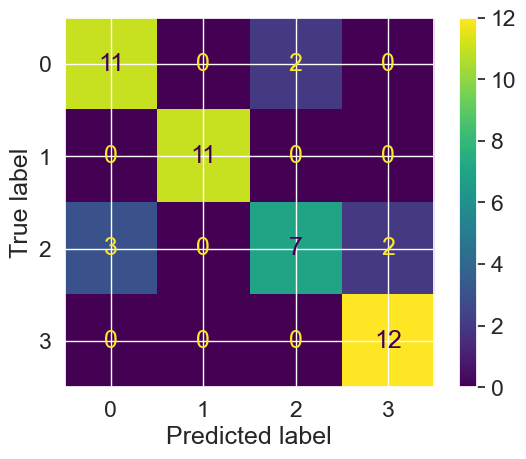

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# fig, ax = plt.subplots(figsize=(10,10))
ax = ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                             y_pred=prediction)

# fig.savefig("confmatrix_notuning.jpg")

In [100]:
plt.savefig("confmatrix_notuning.jpg")

<Figure size 640x480 with 0 Axes>

**Cross Validation Score**

In [95]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
cross_val_score(knn, X, y, cv=5)

array([0.875  , 0.78125, 0.78125, 0.75   , 0.65625])

In [134]:
np.random.seed(42)

# Single training and test split score
knn_single_score = knn.score(X_test, y_test)

# Take the mean of 5-fold cross validation score
knn_cross_val_score = np.mean(cross_val_score(knn, X, y, cv=10))

# Compare the two
knn_single_score, knn_cross_val_score

(0.8541666666666666, 0.78125)